# Analysis of FordGo Bike trends

## (January 2018 - April 2019)

## Overview


FordGo bike now Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate (a company based in New York City that operates bicycle sharing systems in the United States), in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Beginning operation in August 2013 as Bay Area Bike Share, the Bay Wheels system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States.

As of January 2018, the system had seen nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers.

### Data Wrangling


The data set contains ride of each user over a time period of January 2019 to April 2019.

In [1]:
# importing necessary libraries
import os
import glob
import zipfile
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import radians, sin, cos, acos

%matplotlib inline

In [2]:
#files to be downloaded, Jan 2018 to April 2019 from fordgo

year_data = [201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904]

for year in year_data:
    
    url = f"https://s3.amazonaws.com/fordgobike-data/{year}-fordgobike-tripdata.csv.zip"
    response = requests.get(url)
    with open(f"./Data/{year}-fordgobike-tripdata.csv.zip", mode = "wb") as file:
        file.write(response.content)

In [3]:
files = [x for x in os.walk("./Data/")][0][2]

for x in files:
    if ".zip" in x:
        with zipfile.ZipFile(f"./Data/{x}",'r') as zip_ref:
            zip_ref.extractall("./Data/")

In [4]:
#saving all the csvs file to a single csv file for analysis

path = r'./Data/'
file1 = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(a) for a in file1), ignore_index = True)
df.to_csv('fordgo_master.csv', index = False)

In [5]:
#importing data
df = pd.read_csv('fordgo_master.csv')

In [6]:
#checking data
df.head(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No
5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,236.0,Market St at 8th St,37.803686,-122.282497,160.0,West Oakland BART Station,37.805318,-122.294837,1306,Customer,NaN,NaN,No
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No
8,996,2018-01-31 23:34:56.0040,2018-01-31 23:51:32.6740,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes
9,825,2018-01-31 23:34:14.0270,2018-01-31 23:47:59.8090,305.0,Ryland Park,37.342725,-121.895617,317.0,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes


In [7]:
# appending duration in minutes
df['duration_min'] = df['duration_sec']/60

In [8]:
# checking the stats
df.duration_min.describe()

count    2.734625e+06
mean     1.386036e+01
std      3.721580e+01
min      1.016667e+00
25%      5.766667e+00
50%      9.166667e+00
75%      1.435000e+01
max      1.439433e+03
Name: duration_min, dtype: float64

In [9]:
# setting limit for duration (2 - 60 min) or (120 - 3600 sec)
df = df.query('duration_min <=60' and 'duration_min >= 5')

In [10]:
# appending member age
df['member_age'] = 2019-df['member_birth_year']

In [11]:
# checking standard deviation
df.member_age.std()

10.297458449347952

In [12]:
# getting detailed information for men=mber age column
df.member_age.describe(percentiles = [ .1 , .2 , .3 , .4 , .5 , .6 , .7 , .8 , .95])

count    2.081160e+06
mean     3.540021e+01
std      1.029746e+01
min      1.800000e+01
10%      2.500000e+01
20%      2.700000e+01
30%      2.900000e+01
40%      3.100000e+01
50%      3.300000e+01
60%      3.500000e+01
70%      3.800000e+01
80%      4.300000e+01
95%      5.600000e+01
max      1.410000e+02
Name: member_age, dtype: float64

In [13]:
# 95% of the people are under 56 , so we can set age limit 18 to 60 and remove rest of the values. 
df = df.query('member_age <=60' and 'member_age >= 18')

In [14]:
# checking for changes
df.member_age.describe()

count    2.081160e+06
mean     3.540021e+01
std      1.029746e+01
min      1.800000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.000000e+01
max      1.410000e+02
Name: member_age, dtype: float64

In [15]:
# converting start month to datetime format then appending starting month  
df.start_time = pd.to_datetime(df.start_time)
df['start_month'] = df['start_time'].dt.month.astype(int)

In [16]:
# appending starting day
df['start_day'] = df['start_time'].dt.strftime('%a')

In [17]:
# appending starting date
df['start_date'] = df['start_time'].dt.day.astype(int)

In [18]:
# appending start time
df['start_hour'] = df['start_time'].dt.hour

In [19]:
# checking data
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age,start_month,start_day,start_date,start_hour
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,Subscriber,1986.0,Male,No,1254.733333,33.0,1,Wed,31,22
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,Customer,1996.0,Male,No,1192.933333,23.0,1,Wed,31,14
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,Subscriber,1991.0,Male,No,666.100000,28.0,1,Wed,31,19
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,...,Subscriber,1988.0,Male,No,7.550000,31.0,1,Wed,31,23
8,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.6740,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,...,Subscriber,1987.0,Male,Yes,16.600000,32.0,1,Wed,31,23


In [20]:
# appending distance with the help of 'haversine' formula using coordinates.
def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    v = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    y = 2 * math.atan2(math.sqrt(v), math.sqrt(1 - v))
    z = radius * y

    return z

In [21]:
# Using the calcuated math on columns for lat and long

df['ride_distance'] = df.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), 
                                                  (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [22]:
# length of data, total number of rides
len(df)

2081160

In [23]:
# checking for duplicate values, no duplicate entries
df.duplicated().sum()

0

In [24]:
# checking for NaN values, 10116 entries found. Will remove in the next step.
df.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           10116
start_station_name         10116
start_station_latitude         0
start_station_longitude        0
end_station_id             10116
end_station_name           10116
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year              0
member_gender                  0
bike_share_for_all_trip        0
duration_min                   0
member_age                     0
start_month                    0
start_day                      0
start_date                     0
start_hour                     0
ride_distance                  0
dtype: int64

In [25]:
# checking data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2081160 entries, 0 to 2734624
Data columns (total 23 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
duration_min               float64
member_age                 float64
start_month                int32
start_day                  object
start_date                 int32
start_hour                 int64
ride_distance              float64
dtypes: datetime64[ns](1), float64(10), int32(2), int64(3), object(7)
memory usage: 365.2+ M

## Data Cleaning

1. we need to remove the NaN values from the data set to acquire accurate analysis
2. end time datatype needs to be changed to timestamps
3. user type, gender , bike_share_for_all_trip can be changed to category

In [26]:
#creating copy of data

df1 = df.copy()

In [27]:
# removing the NaN values from the data set

df1.dropna()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age,start_month,start_day,start_date,start_hour,ride_distance
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,1986.0,Male,No,1254.733333,33.0,1,Wed,31,22,2.492254
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,1996.0,Male,No,1192.933333,23.0,1,Wed,31,14,2.974502
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,1991.0,Male,No,666.100000,28.0,1,Wed,31,19,2.440571
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,...,1988.0,Male,No,7.550000,31.0,1,Wed,31,23,1.341918
8,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.6740,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,...,1987.0,Male,Yes,16.600000,32.0,1,Wed,31,23,3.859628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2734618,396,2019-04-01 00:14:37.960,2019-04-01 00:21:14.4020,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,365.0,Turk St at Fillmore St,37.780450,...,1986.0,Male,No,6.600000,33.0,4,Mon,1,0,1.420055
2734619,421,2019-04-01 00:11:05.276,2019-04-01 00:18:06.8220,280.0,San Fernando St at 7th St,37.337122,-121.883215,305.0,Ryland Park,37.342725,...,1992.0,Male,Yes,7.016667,27.0,4,Mon,1,0,1.261060
2734621,539,2019-04-01 00:03:02.573,2019-04-01 00:12:02.0670,78.0,Folsom St at 9th St,37.773717,-122.411647,77.0,11th St at Natoma St,37.773507,...,1981.0,Male,Yes,8.983333,38.0,4,Mon,1,0,0.386864
2734623,471,2019-04-01 00:01:38.411,2019-04-01 00:09:29.9650,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,1996.0,Female,Yes,7.850000,23.0,4,Mon,1,0,0.979824


In [28]:
#changing the datatype of start time and end time to timestamps

df1.end_time = pd.to_datetime(df1.end_time)

In [29]:
#changing the datatype of user type, gender, bike_share_for_all_trip to category

df1.user_type = df1.user_type.astype('category')
df1.member_gender = df1.member_gender.astype('category')
df1.bike_share_for_all_trip = df1.bike_share_for_all_trip.astype('category')

In [30]:
df1.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2081160 entries, 0 to 2734624
Data columns (total 23 columns):
duration_sec               2081160 non-null int64
start_time                 2081160 non-null datetime64[ns]
end_time                   2081160 non-null datetime64[ns]
start_station_id           2071044 non-null float64
start_station_name         2071044 non-null object
start_station_latitude     2081160 non-null float64
start_station_longitude    2081160 non-null float64
end_station_id             2071044 non-null float64
end_station_name           2071044 non-null object
end_station_latitude       2081160 non-null float64
end_station_longitude      2081160 non-null float64
bike_id                    2081160 non-null int64
user_type                  2081160 non-null category
member_birth_year          2081160 non-null float64
member_gender              2081160 non-null category
bike_share_for_all_trip    2081160 non-null category
duration_min               2081160 non-null 

#### What is the structure of your dataset?

The FordGoBike data has been collected from the website. The data set contains data from January 2018 to April 2019 for each user who rented a bike from fordgo bikes now Lyft bikes.

There are approximately 2,081,160 rides for all the users for 16 months from January 2018 to April 2019 after filtering and cleaning the data.

The data points we have on each user :

- Trip Duration (seconds):

    - Start Time and Date
    - End Time and Date

- Start Station ID

    - Start Station Name
    - Start Station Latitude
    - Start Station Longitude

- End Station ID
    - End Station Name
    - End Station Latitude
    - End Station Longitude

- Bike ID
- User Type (Subscriber or Customer – “Subscriber” or “Customer”)
- Member Year of Birth
- Member Gender

Following columns have been added during wrangling and cleaning:


- Duration in min               
- Member Age                 
- Start Month                
    - start_day                  
    - start_date                 
    - start_hour                 
- Ride Distance in Km 


#### What is/are the main feature(s) of interest in your dataset?

Interest is getting the insight out and understanding the user behavior with relationship to their attributes  like:

- Distribution of riders on a monthly and daily basis

- Average ride duration

- Average ride distance

- Age groups of users

- Gender distribution


#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I feel that age group ,usage type , start and end time will make a impact in the analysis. It should provide some insight on the user's behaviour.


## Univariate Exploration

We begin with the monthly trend of number of bike rentals and distribution of weekdays and hours of the day.

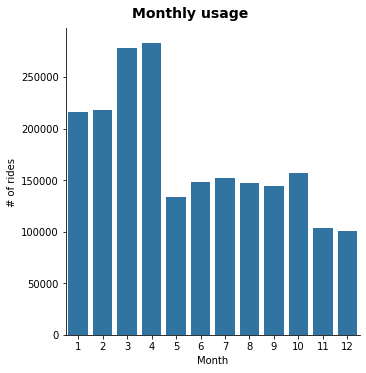

In [31]:
# monthly usage

g = sns.catplot(data=df1, x='start_month', kind='count', color = sns.color_palette()[0] )
g.set_axis_labels("Month", "# of rides")
g.fig.suptitle('Monthly usage', y=1.03, fontsize=14, fontweight='semibold');

From the above analysis we can clearly noticed that usage was high during first quater and in the month of April and then there is a sudden downfall in usage. Also a high increase during March and April. This may be due to the climatic conditions.  

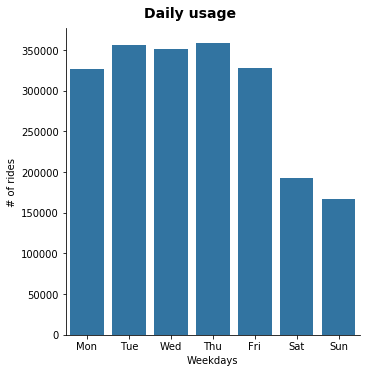

In [32]:
# daily usage

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df1, x='start_day', kind='count', color = sns.color_palette()[0], order = days)
g.set_axis_labels("Weekdays", "# of rides")
g.fig.suptitle('Daily usage', y=1.03, fontsize=14, fontweight='semibold');

From the above analysis we can clearly see that people tend to rent a bike on the weekdays and on weekends user's prefer private means. 

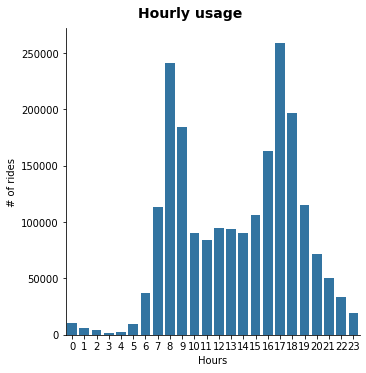

In [33]:
# hourly usage

g = sns.catplot(data=df1, x='start_hour', kind='count', color = sns.color_palette()[0])
g.set_axis_labels("Hours", "# of rides")
g.fig.suptitle('Hourly usage', y=1.03, fontsize=14, fontweight='semibold');

Users' mainly rent a bike during the office hours or educational institute to commute, 7-9am to 4-6pm are rush hours.

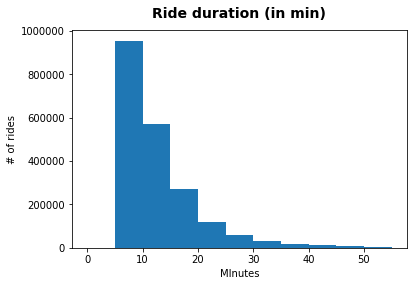

In [36]:
# proportion duration (in min)

bin_edges = np.arange(0, 60, 5)
plt.hist(data = df1, x = 'duration_min',bins = bin_edges, color = sns.color_palette()[0])

plt.title("Ride duration (in min)", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('MInutes')
plt.ylabel('# of rides');

In [37]:
df1.duration_min.describe()

count    2.081160e+06
mean     1.502835e+01
std      3.509888e+01
min      5.000000e+00
25%      7.533333e+00
50%      1.055000e+01
75%      1.548333e+01
max      1.438017e+03
Name: duration_min, dtype: float64

The average trip is of 15 minutes, with 75% of trips being under 16 minutes. Observing the histogram, most rides are between the 3 - 11 minute range. Thus it means that rides are booked for short distances.

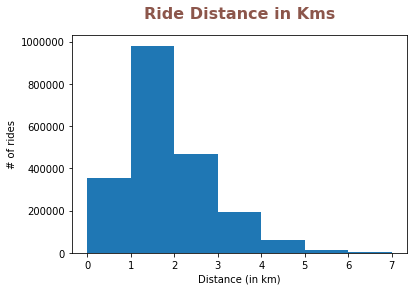

In [38]:
# Ride distance (in km)
bin_edges = np.arange(0, 8, 1)

plt.hist(data = df1, x = 'ride_distance', bins = bin_edges);

plt.title("Ride Distance in Kms", y=1.05, fontsize=16, fontweight='bold', color = sns.color_palette()[5])
plt.xlabel('Distance (in km)')
plt.ylabel('# of rides');

In [40]:
df1.ride_distance.describe()

count    2.081160e+06
mean     1.969938e+00
std      3.657907e+01
min      0.000000e+00
25%      1.161411e+00
50%      1.631260e+00
75%      2.364074e+00
max      1.279835e+04
Name: ride_distance, dtype: float64

From the above observation we can see that bikes are booked for short distances with average distance of around 2 kms and 75% of the users go around 2.4 kms.

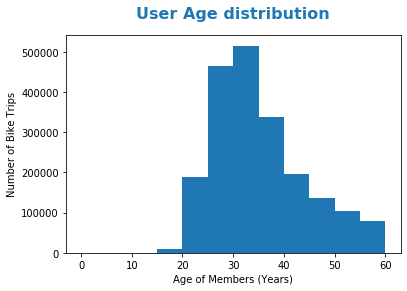

In [41]:
# Age group distribution

bin_edges = np.arange(0, 65, 5)

plt.hist(data = df1, x = 'member_age', bins = bin_edges);

plt.title("User Age distribution", y=1.05, fontsize=16, fontweight='bold', color = sns.color_palette()[0])
plt.xlabel('Age of Members (Years)')
plt.ylabel('Number of Bike Trips');

In [45]:
df1.member_age.describe()

count     2081160.0
unique         92.0
top            31.0
freq       124021.0
Name: member_age, dtype: float64

We can see that the average user's age is 31 and generally 75% of the users are under 40 years of age.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Unusal points came for the duration, where sometimes the value was more than 24 hours. 

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


Unusal distribution occured for the member birth year, in which some values were dated before 1900. Since 95% of the members were between 18 and 56 years, I removed users older than 60.

### Bivariate Exploration

Text(0, 0.5, '# of rides')

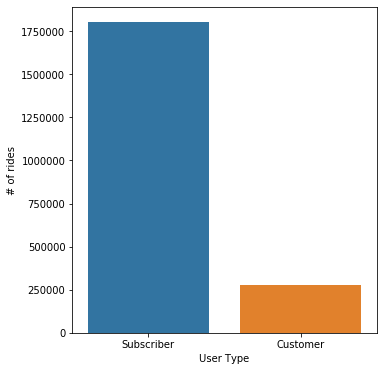

In [47]:
# distribution of user types

plt.figure(figsize = [12, 6])

plt.subplot(1, 2, 1)

g = sns.countplot(data=df1, x="user_type", order=df1.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('# of rides')

The bike sharing system is mainly used by subscribers with 88% proportion and than ocassional, customer with 12%.


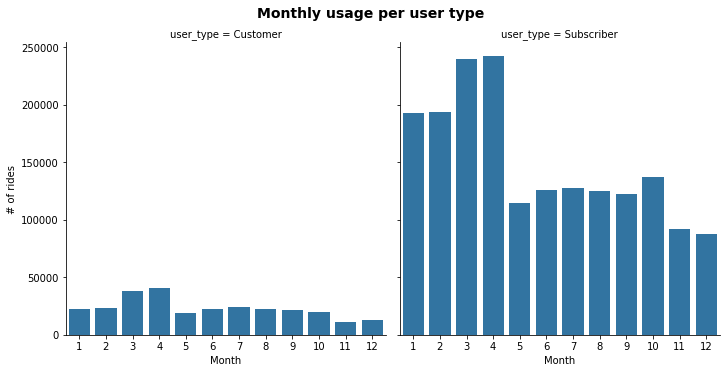

In [48]:
# monthly usage per user type

g = sns.catplot(data=df1, x='start_month',col = 'user_type', kind='count', color = sns.color_palette()[0] )
g.set_axis_labels("Month", "# of rides")
g.fig.suptitle('Monthly usage per user type', y=1.03, fontsize=14, fontweight='semibold');

The trend is similar for both customer and subscriber first quater and april has high usage.

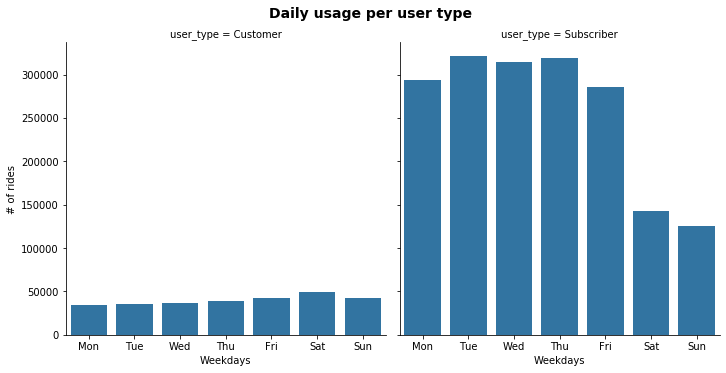

In [60]:
# daily usage per user type

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df1, x='start_day',col = 'user_type', kind='count',color = sns.color_palette()[0], order = days)
g.set_axis_labels("Weekdays", "# of rides")
g.fig.suptitle('Daily usage per user type', y=1.03, fontsize=14, fontweight='semibold');

For subscriber we can see the trend with weekdays whereas for customers its almost same for each day.

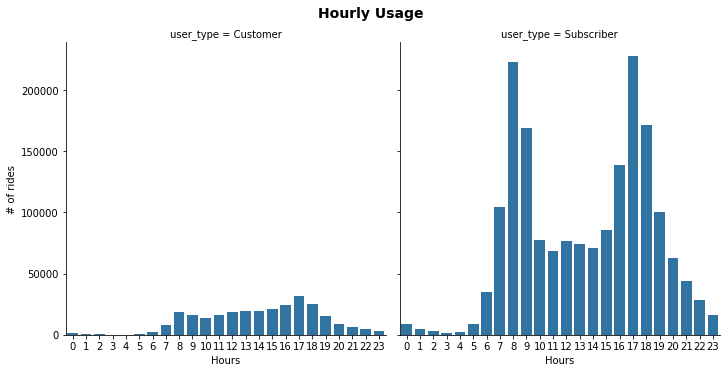

In [61]:
# hourly usage per user type

g = sns.catplot(data=df1, x='start_hour',col = 'user_type', kind='count', color = sns.color_palette()[0])
g.set_axis_labels("Hours", "# of rides")
g.fig.suptitle('Hourly Usage', y=1.03, fontsize=14, fontweight='semibold');

Both customer and subscriber has high usage during office hours.

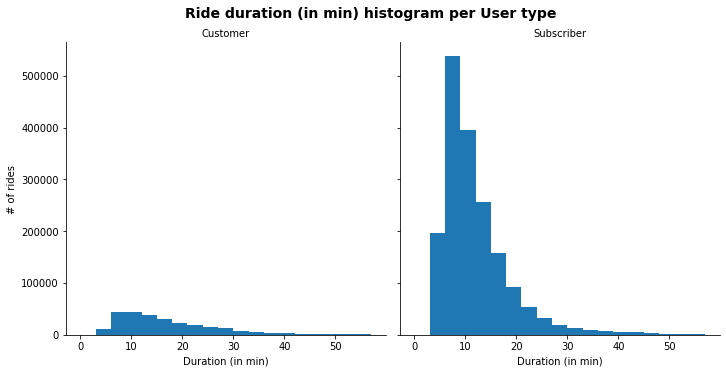

In [62]:
#duration (sec) distribution per user type

g = sns.FacetGrid(df1, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 60,3)
g.map(plt.hist, "duration_min", color=sns.color_palette()[0], bins=bin_edges)
g.set_axis_labels("Duration (in min)", "# of rides")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Ride duration (in min) histogram per User type', y=1.03, fontsize=14, fontweight='semibold');

We can observe that trip durations are longer for customers around 8 to 23 minutes than for subscribers 7 to 12 minutes.Subscriber tend to have less ride hour as they mainly commute to office or educational institute, so they have a fixed distance. While customers have rather more ride durations as compared to customers beacuse they are mainly tourists or casual travellers.

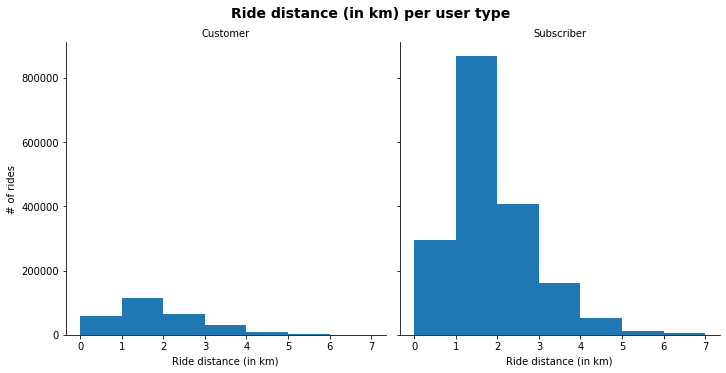

In [63]:
#ride distance (in km) distribution per user type

g = sns.FacetGrid(df1, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 8, 1)
g.map(plt.hist, "ride_distance", color=sns.color_palette()[0], bins=bin_edges)
g.set_axis_labels("Ride distance (in km)", "# of rides")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Ride distance (in km) per user type', y=1.03, fontsize=14, fontweight='semibold');

Both customer and subscriber travel for short distances, the number of rides of subscribers are much greater than customers. 

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


Grouping the data in user type provided much more insigh of the data. People who rent bike are generally casual riders like tourists, or students residing nearby and is mainly rented during first quater and april month. Customers tend to increase during weekends. Bikes are mainly rented during 7-9 am and 5-7pm to commute to office or educational institute.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Subscribers most frequently rent, around 7-9am and 4-6pm. Customers rent at weekend around 10am-5pm and weekday 5-6pm. Customers rent during weekend for casual purpose.

### Multivariate Exploration

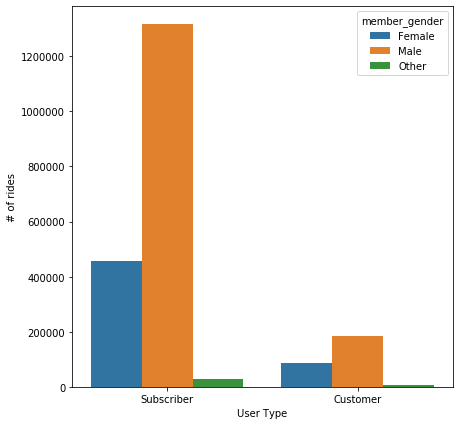

In [70]:
# no of bike trips vs user type with category filters as gender

plt.figure(figsize = [15, 7])

plt.subplot(1, 2, 1)

g = sns.countplot(data=df1, x="user_type", hue="member_gender", order=df1.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('# of rides');

Male in subscriber user type tend to have more rides than the male in customer, female and other have few rides. We can predict that customers are mainly casual visiters.

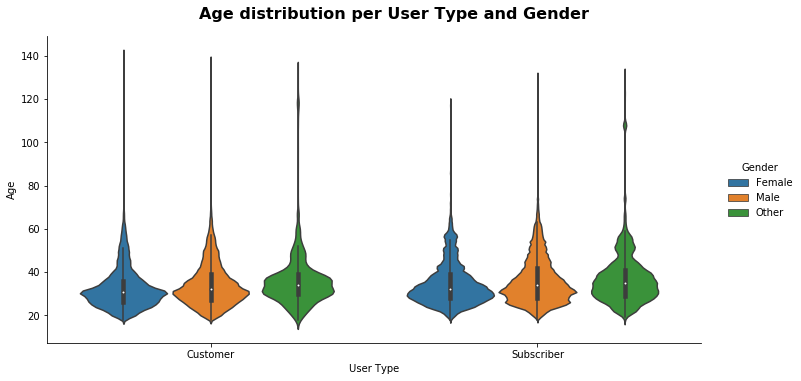

In [77]:
#age distribution per user type and gender

graph = sns.catplot(data=df1, x="user_type", y="member_age", hue="member_gender", kind="violin", height=5, aspect=2);

graph.set_axis_labels("User Type", "Age")
graph._legend.set_title('Gender')
graph.fig.suptitle('Age distribution per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

Its good to see that all genders have equal age distribution also for user types. But subscribers also have slighly aged persons 40 to 50 years age which is very encouraging. 

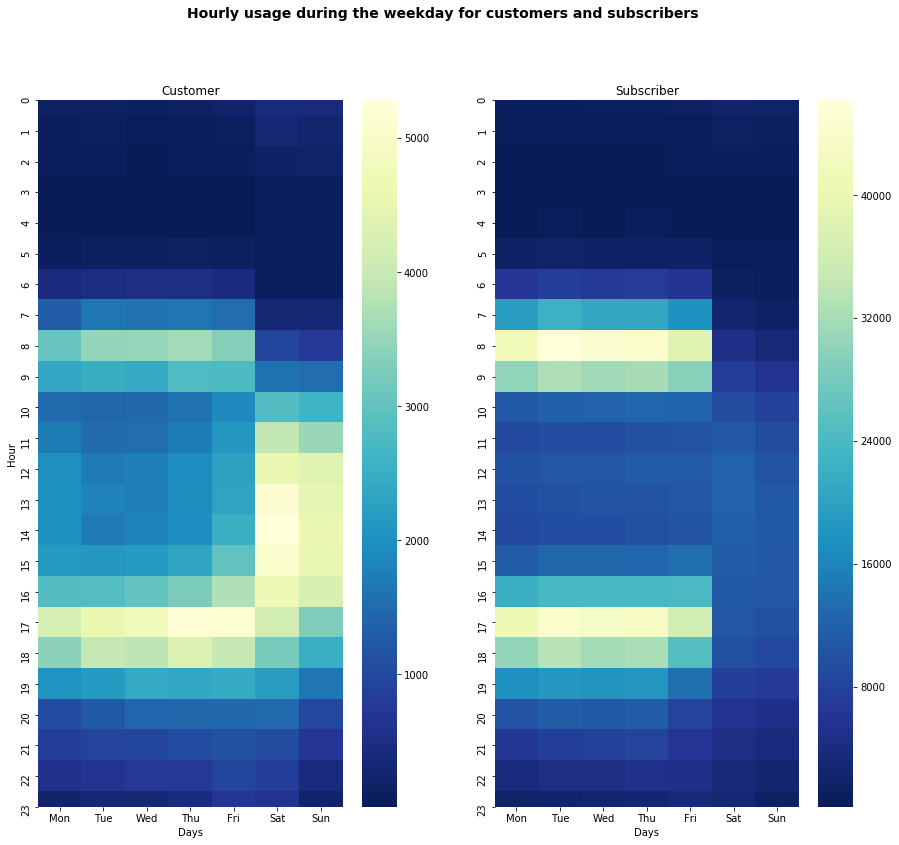

In [83]:
# weekday order

df1['start_day'] = pd.Categorical(df1['start_day'],categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)
plt.figure(figsize=(15,13))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap customers
plt.subplot(1, 2, 1)
df_cust = df1.query('user_type == "Customer"').groupby(["start_hour", "start_day"])["bike_id"].size().reset_index()
df_cust = df_cust.pivot("start_hour", "start_day", "bike_id")
sns.heatmap(df_cust, cmap='YlGnBu_r')

plt.title("Customer")
plt.xlabel('Days')
plt.ylabel('Hour')

# heatmap subscribers
plt.subplot(1, 2, 2)
df_subs = df1.query('user_type == "Subscriber"').groupby(["start_hour", "start_day"])["bike_id"].size().reset_index()
df_subs = df_subs.pivot("start_hour", "start_day", "bike_id")
sns.heatmap(df_subs, cmap='YlGnBu_r')

plt.title("Subscriber")
plt.xlabel('Days')
plt.ylabel('');

Customers rent more often on weekends, while Subscribers primarily use the bikes on weekdays.


#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Customers: During weekdays, most bike rides occur between 4-6pm, peaking on Fridays around 5pm. During weekends, most bike rides occur between 11am and 6pm, peaking on Saturdays around 2pm.

Subscribers: During weekdays, most bike rides occur around 8-9am and 4-6pm.

#### Were there any interesting or surprising interactions between features?

It was interesting and also surprising to see 40-50 years old group active. 

#### Sources
    1. FordGoBike Data Set
    2. Haversine formula used to calculate distances using latitude and longitude
    3. Stackoverflow
    4. Google

In [84]:
df1.to_csv('fordgo_master_clean.csv', index = False)